# Berkeley-ImSeg Pipeline

In [25]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import time

from src.utils import load_image, load_gt, compute_iou_score, compute_boundary_recall
from src.segmentation.otsu import otsu
from src.segmentation.kmeans import kmeans
from src.segmentation.region_growing import region_growing
from src.segmentation.SLIC import SLIC
from src.segmentation.split_and_merge import split_and_merge
from src.segmentation.watershed import watershed

In [26]:
INDEXES = [113016, 247085, 24063, 2092, 15088, 20008, 55067, 71046]

In [27]:
image_paths = [f'data\\images\\train\\{i}.jpg' for i in INDEXES]
ground_paths = [f'data\\ground_truth\\train\\{i}.mat' for i in INDEXES]

In [28]:
import cv2
method = SLIC
original_images = [load_image(image_path) for image_path in image_paths]
segmented_images = []
execution_times = []
for i in range(len(INDEXES)):
    start_time = time.time()
    segmented_image = method(original_images[i])
    end_time = time.time()
    execution_times.append(end_time - start_time)
    if i==5:
        segmented_images.append(cv2.bitwise_not(segmented_image))
    else:
        segmented_images.append(segmented_image)
gt_segmentation_bins = [load_gt(ground_path) for ground_path in ground_paths]

c:\Users\ismoi\anaconda3\envs\computervision\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ismoi\anaconda3\envs\computervision\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ismoi\anaconda3\envs\computervision\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\ismoi\anaconda3\envs\computervision\lib\site-packages\sklearn\clust

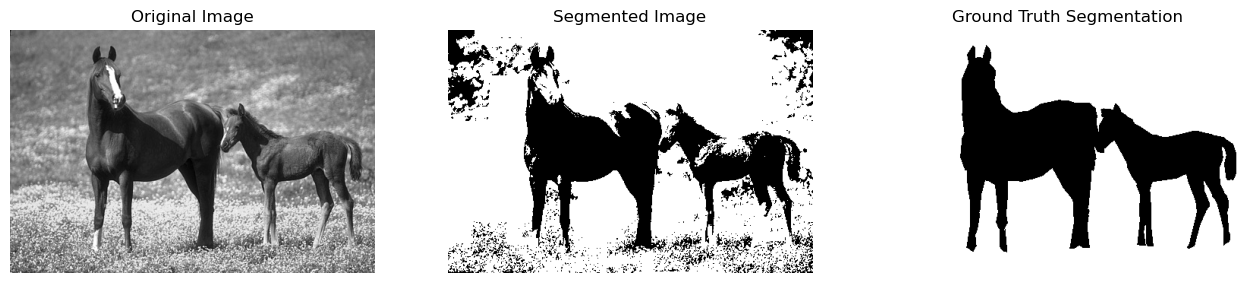

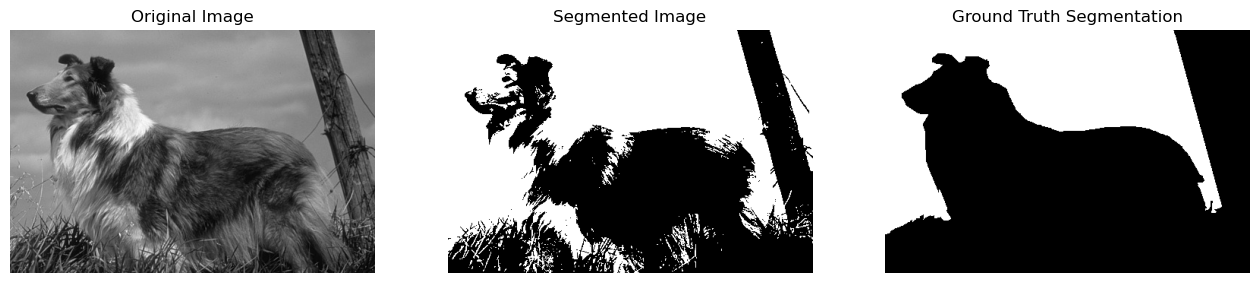

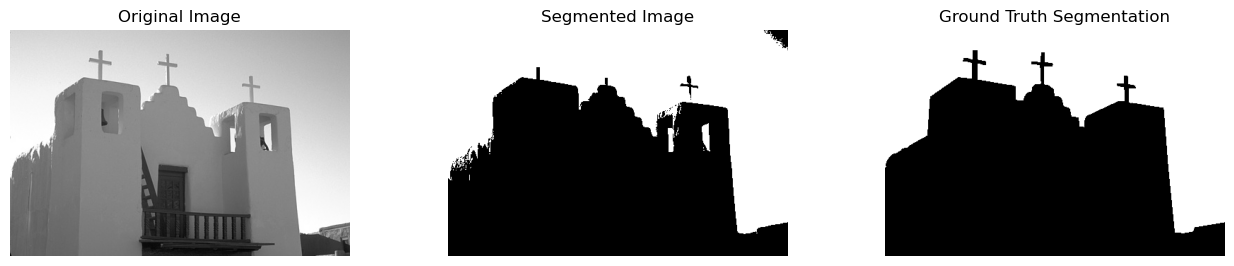

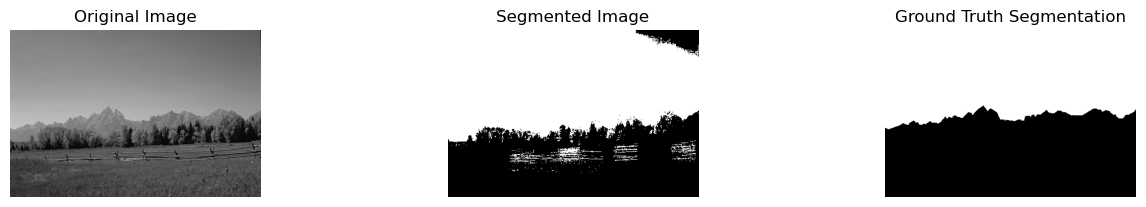

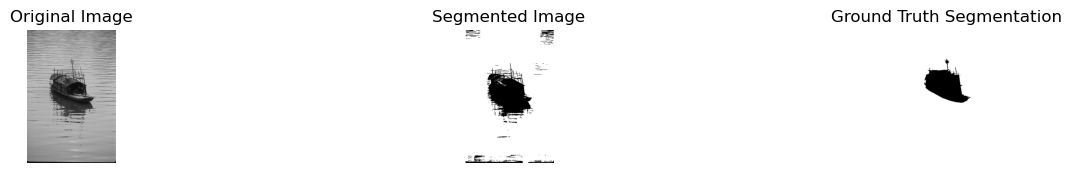

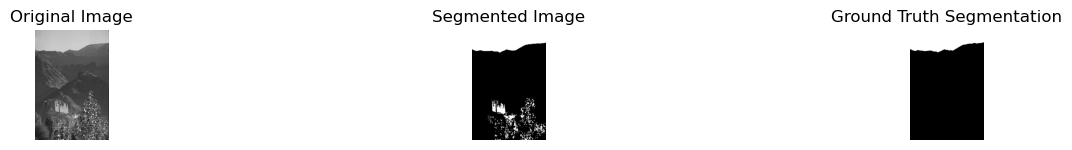

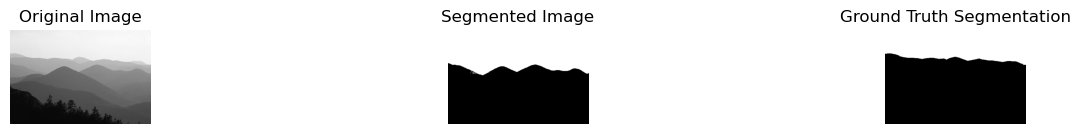

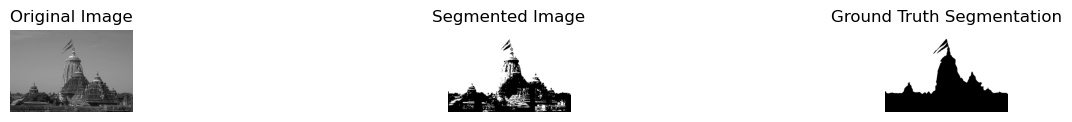

In [29]:
for i in range(len(INDEXES)):
    plt.figure(figsize=(16, 10))
    plt.subplot(i+1, 3, 1), plt.imshow(original_images[i], cmap='gray'), plt.title('Original Image')
    plt.axis('off')
    plt.subplot(i+1, 3, 2), plt.imshow(segmented_images[i], cmap='gray'), plt.title('Segmented Image')
    plt.axis('off')
    plt.subplot(i+1, 3, 3), plt.imshow(gt_segmentation_bins[i], cmap='gray'), plt.title('Ground Truth Segmentation')
    plt.axis('off')
plt.show()

In [30]:
iou_scores = [compute_iou_score(segmented_image, gt_segmentation_bin) for segmented_image, gt_segmentation_bin in zip(segmented_images, gt_segmentation_bins)]
recall_scores = [compute_boundary_recall(segmented_image, gt_segmentation_bin) for segmented_image, gt_segmentation_bin in zip(segmented_images, gt_segmentation_bins)]
for i in range(len(INDEXES)):
    print(f"+" + "-"*40 + "+")
    print(f"Image : {INDEXES[i]}")
    print(f"IoU Score : {iou_scores[i]}\nBoundary Recall Score : {recall_scores[i]}")

print(f"+" + "-"*40 + "+")
print(f"Mean IoU: {np.mean(iou_scores)*100}, Standard Deviation IoU: {np.std(iou_scores)*100}")
print(f"Mean Boundary Recall: {np.mean(recall_scores)*100}, Standard Deviation Boundary Recall: {np.std(recall_scores)*100}")
print(f"Mean Time Executions: {np.mean(execution_times)}, Standard Deviation Time Executions: {np.std(execution_times)}")

+----------------------------------------+
Image : 113016
IoU Score : 0.8443
Boundary Recall Score : 0.9666
+----------------------------------------+
Image : 247085
IoU Score : 0.642
Boundary Recall Score : 0.9964
+----------------------------------------+
Image : 24063
IoU Score : 0.9417
Boundary Recall Score : 0.9993
+----------------------------------------+
Image : 2092
IoU Score : 0.8196
Boundary Recall Score : 1.0
+----------------------------------------+
Image : 15088
IoU Score : 0.9062
Boundary Recall Score : 0.9734
+----------------------------------------+
Image : 20008
IoU Score : 0.7721
Boundary Recall Score : 1.0
+----------------------------------------+
Image : 55067
IoU Score : 0.7394
Boundary Recall Score : 1.0
+----------------------------------------+
Image : 71046
IoU Score : 0.8843
Boundary Recall Score : 0.9795
+----------------------------------------+
Mean IoU: 81.87, Standard Deviation IoU: 9.180667187083953
Mean Boundary Recall: 98.94000000000001, Standard D